In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn._config import set_config
set_config(print_changed_only=False)

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df = pd.DataFrame(data=iris.data, columns=feature_names)
df['target'] = iris.target

df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

df['dbscan_cluster'] = dbscan_labels
df['target'] = iris.target

result = df.groupby(['target'])['dbscan_cluster'].value_counts()
result

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

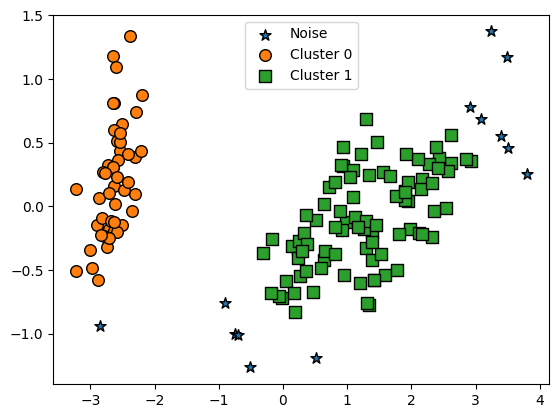

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_transformed = pca.fit_transform(iris.data)

df['ftr1'] = pca_transformed[:,0]
df['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, df, 'dbscan_cluster', iscenter=False)

In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

df['dbscan_cluster'] = dbscan_labels
df['target'] = iris.target

result = df.groupby(['target'])['dbscan_cluster'].value_counts()
result

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64

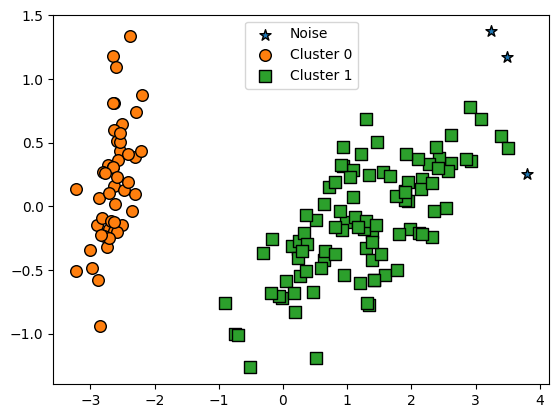

In [9]:
visualize_cluster_plot(dbscan, df, 'dbscan_cluster', iscenter=False)

In [11]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

df['dbscan_cluster'] = dbscan_labels
df['target'] = iris.target

result = df.groupby(['target'])['dbscan_cluster'].value_counts()
result

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64

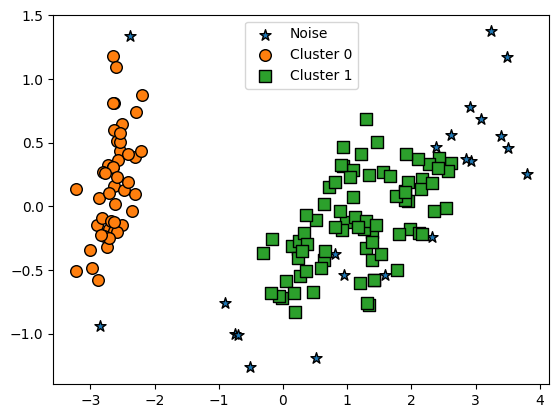

In [12]:
visualize_cluster_plot(dbscan, df, 'dbscan_cluster', iscenter=False)

---

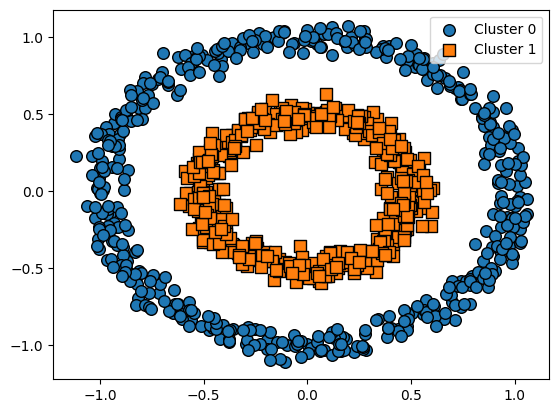

In [13]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, factor=0.5, random_state=42)
df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
df['target'] = y

visualize_cluster_plot(None, df, 'target', iscenter=False)

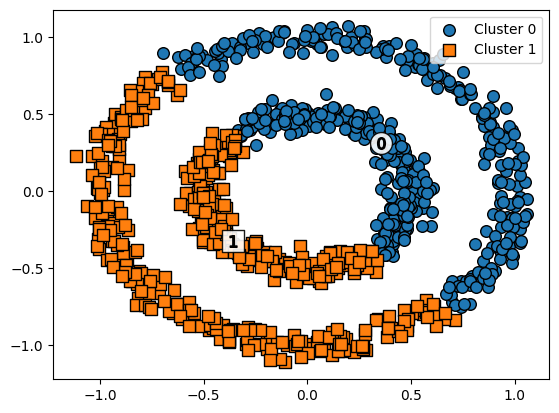

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
df['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, df, 'kmeans_cluster', iscenter=True)

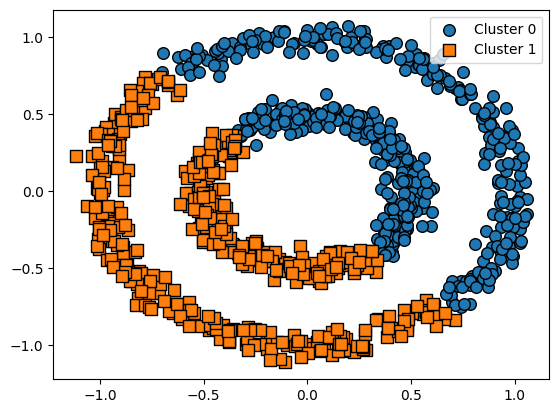

In [15]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_label = gmm.fit(X).predict(X)
df['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, df, 'gmm_cluster', iscenter=False)

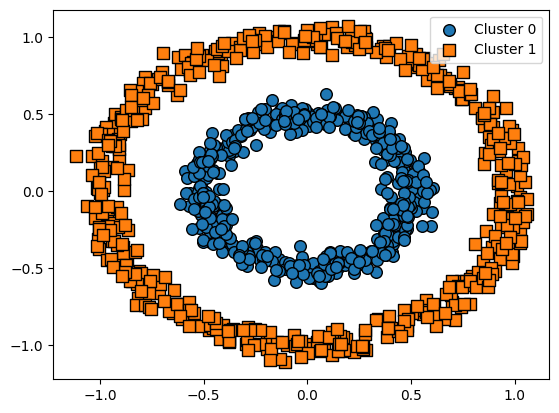

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
df['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, df, 'dbscan_cluster', iscenter=False)